In [117]:
import sqlite3 as lite
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pandas.tools.plotting import scatter_matrix

In [118]:
con = lite.connect('social_stats.db')
cur = con.cursor()

In [119]:
with con:
    cur.execute("PRAGMA table_info(gdp)")
    print(cur.fetchall())

[(0, u'index', u'INTEGER', 0, None, 0), (1, u'country_name', u'TEXT', 0, None, 0), (2, u'_1999', u'REAL', 0, None, 0), (3, u'_2000', u'REAL', 0, None, 0), (4, u'_2001', u'REAL', 0, None, 0), (5, u'_2002', u'REAL', 0, None, 0), (6, u'_2003', u'REAL', 0, None, 0), (7, u'_2004', u'REAL', 0, None, 0), (8, u'_2005', u'REAL', 0, None, 0), (9, u'_2006', u'REAL', 0, None, 0), (10, u'_2007', u'REAL', 0, None, 0), (11, u'_2008', u'REAL', 0, None, 0), (12, u'_2009', u'REAL', 0, None, 0), (13, u'_2010', u'REAL', 0, None, 0)]


In [120]:
join_command = 'SELECT country, year, men_years, women_years, total_years, _1999, _2000, _2001, _2002, _2003, _2004, _2005, _2006, _2007, _2008, _2009, _2010 FROM education LEFT OUTER JOIN gdp ON education.country = gdp.country_name;'


In [121]:
with con:
    cur.execute(join_command)
    data = cur.fetchall()
df_combined = pd.DataFrame(data)

In [122]:
df_combined

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Afghanistan,2004,11,5,8,NaN,NaN,2.461666e+09,4.128818e+09,4.583649e+09,5.285462e+09,6.275076e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10
1,Albania,2004,11,11,11,3.414761e+09,3.632044e+09,4.060759e+09,4.435079e+09,5.746946e+09,7.314865e+09,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10
2,Algeria,2005,13,13,13,4.864061e+10,5.479006e+10,5.474471e+10,5.676029e+10,6.786383e+10,8.532500e+10,1.030000e+11,1.170000e+11,1.350000e+11,1.710000e+11,1.370000e+11,1.610000e+11
3,Andorra,2008,11,12,11,1.239840e+09,1.401694e+09,1.484005e+09,1.717564e+09,2.373836e+09,2.916913e+09,3.248135e+09,3.536452e+09,4.010785e+09,4.001349e+09,3.649863e+09,3.346317e+09
4,Anguilla,2008,11,11,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Austria,2008,15,15,15,2.170000e+11,1.960000e+11,1.970000e+11,2.130000e+11,2.610000e+11,3.000000e+11,3.150000e+11,3.340000e+11,3.860000e+11,4.280000e+11,3.980000e+11,3.900000e+11
6,Azerbaijan,2008,13,13,13,4.581222e+09,5.272617e+09,5.707618e+09,6.236025e+09,7.275766e+09,8.680512e+09,1.324542e+10,2.098302e+10,3.305034e+10,4.885248e+10,4.429149e+10,5.290270e+10
7,Bahrain,2006,14,15,14,6.621010e+09,9.062907e+09,8.976208e+09,9.632155e+09,1.107482e+10,1.315017e+10,1.596873e+10,1.850505e+10,2.173000e+10,2.571088e+10,2.293822e+10,2.571327e+10
8,Bangladesh,2007,8,8,8,5.127057e+10,5.336979e+10,5.399129e+10,5.472408e+10,6.015893e+10,6.510854e+10,6.944294e+10,7.181908e+10,7.961189e+10,9.163128e+10,1.020000e+11,1.150000e+11
9,Belarus,2007,14,15,15,1.213849e+10,1.273686e+10,1.235482e+10,1.459493e+10,1.782544e+10,2.314159e+10,3.021009e+10,3.696182e+10,4.527575e+10,6.075218e+10,4.920866e+10,5.522093e+10


In [123]:
df_combined_column_named = df_combined.rename(columns={0: 'country', 1: 'year', 2: 'men_ed_yrs', 3: 'women_ed_yrs', 4: 'total_ed_yrs', 5: 1999, 6: 2000, 7: 2001, 8: 2002, 9:2003, 10: 2004, 11: 2005, 12: 2006, 13: 2007, 14: 2008, 15: 2009, 16: 2010})

In [124]:
log_gdp = np.log(df_combined_column_named[1999])

In [125]:

X = df_combined_column_named[['men_ed_yrs', 'women_ed_yrs', 'total_ed_yrs']]
y = log_gdp

In [126]:
X = sm.add_constant(X)
est = sm.OLS(y, X, missing="drop").fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   1999   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     8.149
Date:                Mon, 23 May 2016   Prob (F-statistic):           8.57e-05
Time:                        18:30:15   Log-Likelihood:                -178.02
No. Observations:                  83   AIC:                             364.0
Df Residuals:                      79   BIC:                             373.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           18.9466      1.259     15.053      0.000        16.441    21.452
men_ed_yrs       0.4915      0.382      1.285      0.203        -0.270     1.253
women_ed_yrs     0.3729      0.311      1.200      0.234        -0.246     0.991
total_ed_yrs    -0.5285      0.521     -1.014      0.314        -1.566     0.509
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.314
Skew:                          -0.147   Prob(JB):                        0.855
Kurtosis:                       2.934   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
df_log = pd.DataFrame(X)

In [128]:
result = pd.concat([df_log, y], axis=1)

In [129]:
result.head()

,const,men_ed_yrs,women_ed_yrs,total_ed_yrs,1999
0,1,11,5,8,NaN
1,1,11,11,11,21.951373
2,1,13,13,13,24.607725
3,1,11,12,11,20.938248
4,1,11,11,11,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114f37790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117009990>]], dtype=object)

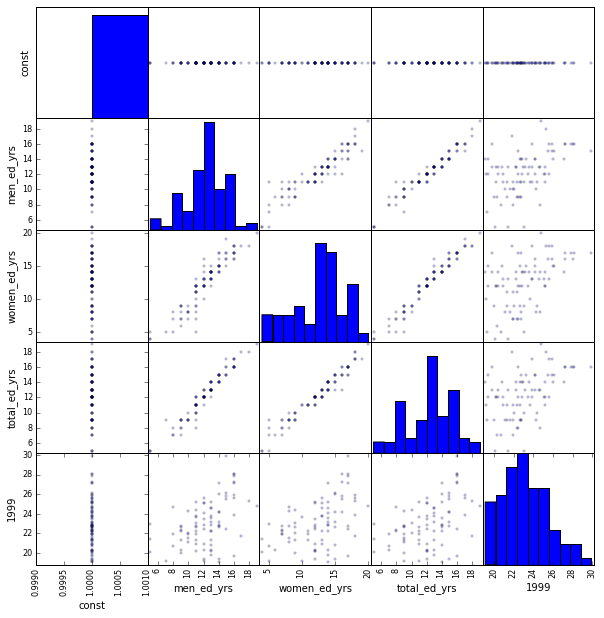

In [131]:
%matplotlib inline
scatter_matrix(result, alpha=0.2, figsize=(10,10))